Name:  

    qspace_scattering

Purpose:  

    Create a scattering phase function but from qspace
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - 
  
Needed Files:

  - baum_2011_ice.out
    
 Modification History:
 
     Written: by Samuel LeBlanc, Santa Cruz, CA, 2015-08-13
            

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color
%matplotlib inline
import numpy as np, h5py
import scipy.io as sio
import scipy
import math, os, IPython
import Sp_parameters as Sp
import load_utils as lm
IPython.InteractiveShell.cache_size = 0
# set the basic directory path
fp='C:/Users/sleblan2/Research/libradtran/ice/'

In [57]:
baum = sio.idl.readsav(fp+'baum_2011_ice.out')

In [58]:
baum.keys()

['pmom', 'ref', 'ext', 'wvl', 'phase', 'theta', 'ssa']

In [59]:
print baum.phase.shape
print baum.ref.shape
print baum.wvl.shape
print baum.theta.shape

(186L, 23L, 1L, 498L)
(23L,)
(186L,)
(186L, 23L, 1L, 498L)


In [60]:
baum.ref

array([  5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,  25. ,
        27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ])

In [61]:
baum.wvl[10]

0.5

In [62]:
baum.k = 2.0*np.pi/baum.wvl

In [63]:
baum.qspace = 2.0*np.sin(baum.theta*np.pi/180.0/2.0)

In [64]:
baum.qspace.shape

(186L, 23L, 1L, 498L)

In [65]:
baum.k.shape

(186L,)

In [66]:
for i,k in enumerate(baum.k):
    baum.qspace[i,:,:,:] = baum.qspace[i,:,:,:]*baum.k[i]

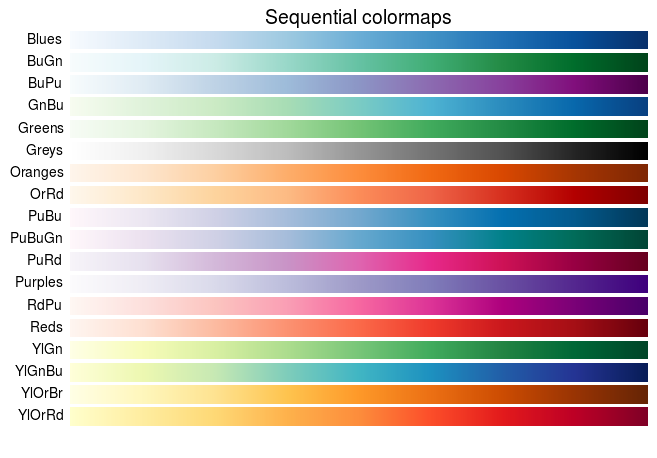

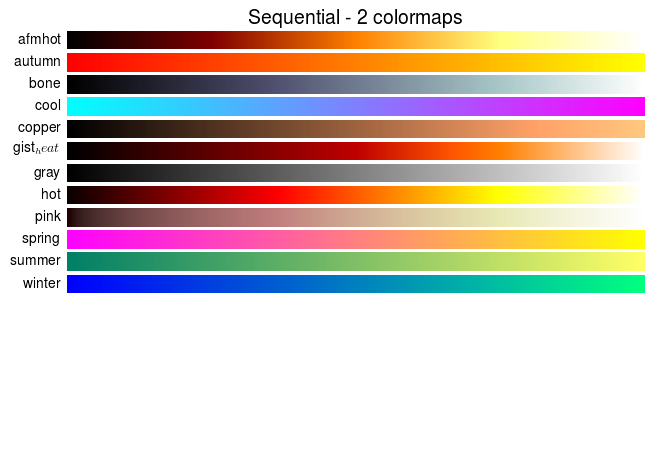

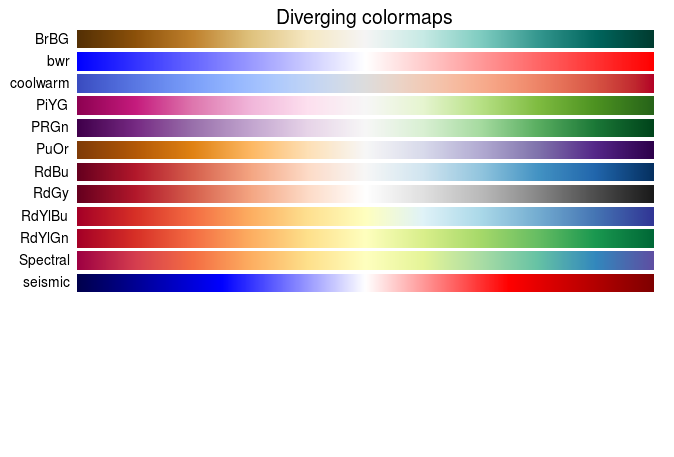

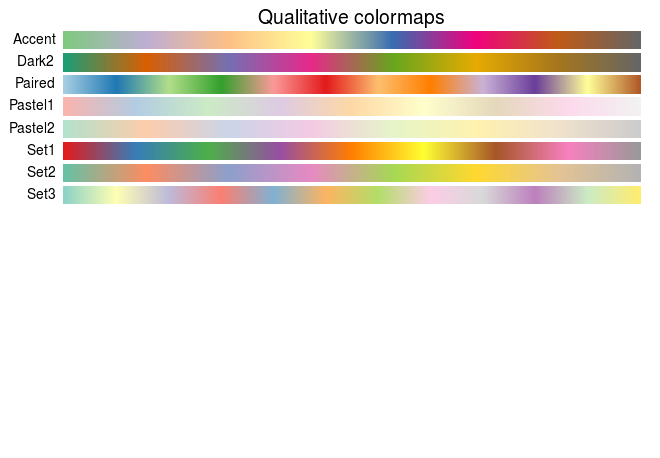

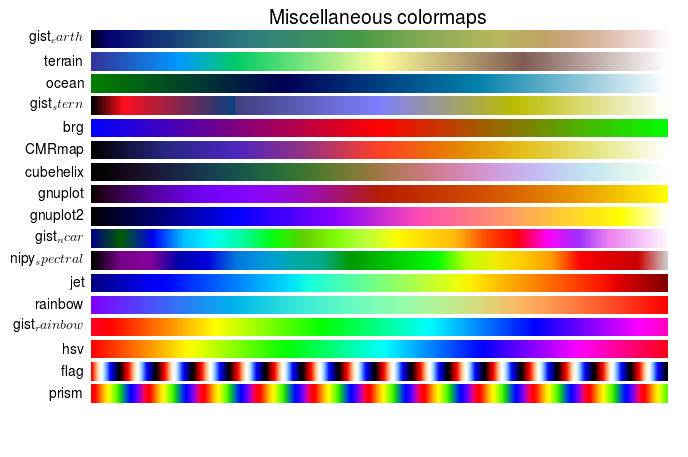

In [36]:
import cmaps
cmaps.cmaps()

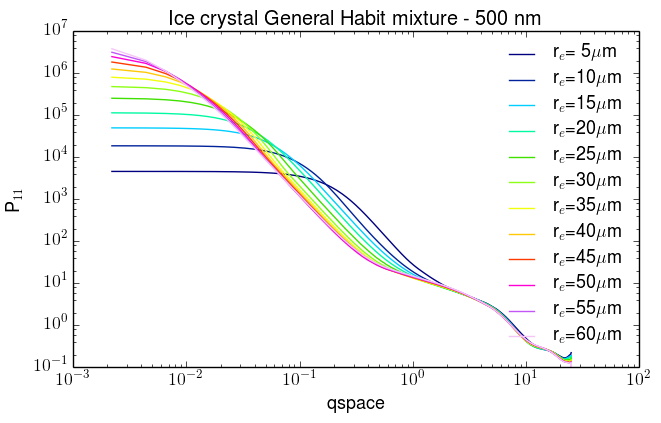

In [67]:
for i,r in enumerate(baum.ref):
    if (i%2 == 0):
        plt.plot(baum.qspace[10,i,0,:],baum.phase[10,i,0,:],label='r$_{e}$=%2i$\\mu$m'%r,color=plt.cm.gist_ncar(float(i)/len(baum.ref)))
plt.yscale('log')
plt.xscale('log')
plt.legend(frameon=False)
plt.title('Ice crystal General Habit mixture - 500 nm')
plt.xlabel('qspace')
plt.ylabel('P$_{11}$')
plt.savefig(fp+'baum_2011_qspace_500nm.png',dpi=600,transparent=True)

In [47]:
import Sp_parameters as sp

In [52]:
baum.dq = baum.qspace
for i,r in enumerate(baum.ref):
    for j,w in enumerate(baum.wvl):
        baum.dq[j,i,0,:] = sp.deriv(np.log(baum.phase[j,i,0,:]),np.log(baum.qspace[j,i,0,:]))

-c:4: RuntimeWarning: invalid value encountered in log
-c:4: RuntimeWarning: divide by zero encountered in log
Sp_parameters.py:83: RuntimeWarning: invalid value encountered in float_scalars
  y[i]*(1.0/(x[i]-x[i+1]) - 1.0/(x[i-1]-x[i])) - \
Sp_parameters.py:84: RuntimeWarning: invalid value encountered in float_scalars
  y[i+1]*(x[i-1]-x[i])/((x[i-1]-x[i+1])*(x[i]-x[i+1]))
Sp_parameters.py:79: RuntimeWarning: invalid value encountered in float_scalars
  y[-2]*(x[-3]-x[-1])/((x[-3]-x[-2])*(x[-2]-x[-1])) - \
Sp_parameters.py:80: RuntimeWarning: invalid value encountered in float_scalars
  y[-1]*((x[-3]-x[-1])+(x[-2]-x[-1]))/((x[-3]-x[-1])*(x[-2]-x[-1]))
Sp_parameters.py:76: RuntimeWarning: invalid value encountered in float_scalars
  y[1]*(x[0]-x[2])/((x[0]-x[1])*(x[1]-x[2])) + \
Sp_parameters.py:77: RuntimeWarning: invalid value encountered in float_scalars
  y[2]*(x[0]-x[1])/((x[0]-x[2])*(x[1]-x[2]))
Sp_parameters.py:83: RuntimeWarning: divide by zero encountered in float_scalars
  y[

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\lines.py:503: RuntimeWarning: invalid value encountered in greater_equal
  return np.alltrue(x[1:] - x[0:-1] >= 0)


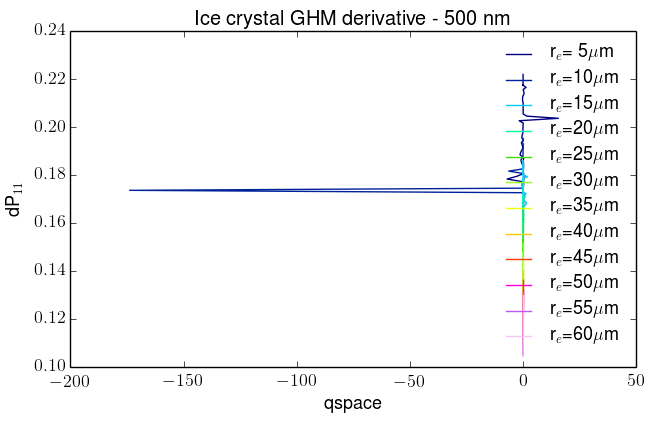

In [53]:
for i,r in enumerate(baum.ref):
    if (i%2 == 0):
        plt.plot(baum.dq[10,i,0,:],baum.phase[10,i,0,:],label='r$_{e}$=%2i$\\mu$m'%r,color=plt.cm.gist_ncar(float(i)/len(baum.ref)))
#plt.yscale('log')
#plt.xscale('log')
plt.legend(frameon=False)
plt.title('Ice crystal GHM derivative - 500 nm')
plt.xlabel('qspace')
plt.ylabel('dP$_{11}$')
plt.savefig(fp+'baum_2011_deriv_qspace_500nm.png',dpi=600,transparent=True)

In [68]:
blogq = np.log(baum.qspace[10,10,0,:])
blogs = np.log(baum.phase[10,10,0,:])

-c:1: RuntimeWarning: divide by zero encountered in log


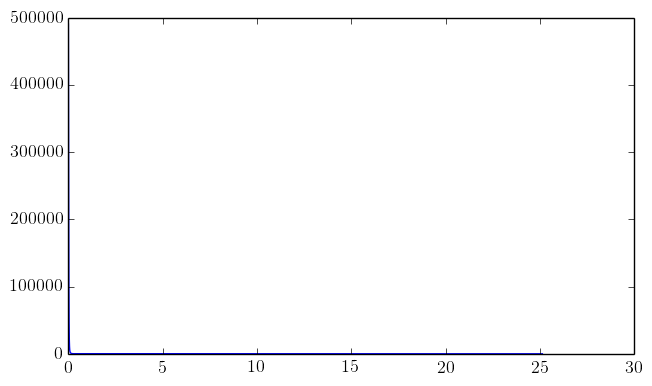

In [69]:
plt.plot(baum.qspace[10,10,0,:],baum.phase[10,10,0,:])

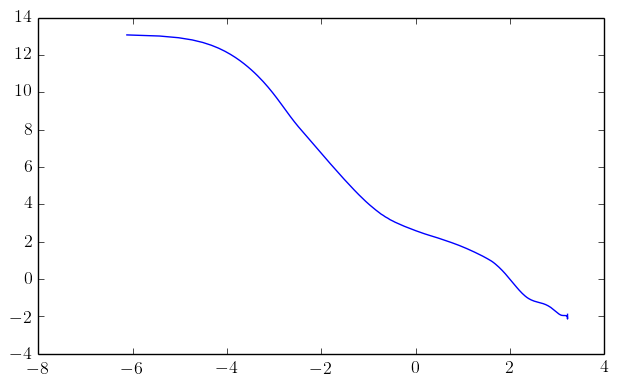

In [70]:
plt.plot(blogq,blogs)

In [85]:
towwrite = np.array(([blogq],[blogs]))[:,0,:]

In [97]:
np.savetxt(fp+'baum_2011_qspace.dat',np.flipud(towwrite.T))

In [96]:
np.flipud(towwrite.T)

array([[            -inf,   1.31033840e+01],
       [ -6.12237263e+00,   1.30827904e+01],
       [ -5.42922544e+00,   1.30234270e+01],
       [ -5.02376032e+00,   1.29316874e+01],
       [ -4.73607826e+00,   1.28144789e+01],
       [ -4.51293468e+00,   1.26788845e+01],
       [ -4.33061314e+00,   1.25296040e+01],
       [ -4.17646265e+00,   1.23715868e+01],
       [ -4.04293156e+00,   1.22075720e+01],
       [ -3.92514825e+00,   1.20406084e+01],
       [ -3.81978798e+00,   1.18733931e+01],
       [ -3.72447777e+00,   1.17060223e+01],
       [ -3.63746643e+00,   1.15395670e+01],
       [ -3.55742383e+00,   1.13750420e+01],
       [ -3.48331594e+00,   1.12129011e+01],
       [ -3.41432285e+00,   1.10527925e+01],
       [ -3.34978437e+00,   1.08948860e+01],
       [ -3.28915977e+00,   1.07390022e+01],
       [ -3.23200154e+00,   1.05850677e+01],
       [ -3.17793441e+00,   1.04329386e+01],
       [ -3.12664104e+00,   1.02829504e+01],
       [ -3.07785106e+00,   1.01349964e+01],
       [ -

In [92]:
np.flipud(towwrite).T.shape

(498L, 2L)

## Do legendre expansion of the qspace log log

In [102]:
qleg = np.polynomial.legendre.legfit(baum.qspace[10,10,0,:],baum.phase[10,10,0,:],50)

In [103]:
qleg.shape

(51L,)

In [104]:
qleg

array([  6.79783942e-03,   5.59914624e-04,   1.59180399e-05,
         3.90352284e-07,   9.01350994e-09,   2.02402248e-10,
         4.48441414e-12,   9.84422233e-14,   2.14988693e-15,
         4.67351686e-17,   1.01162535e-18,   2.17818159e-20,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,

In [108]:
ll = np.polynomial.legendre.Legendre(qleg)

In [111]:
x,y = ll.linspace()

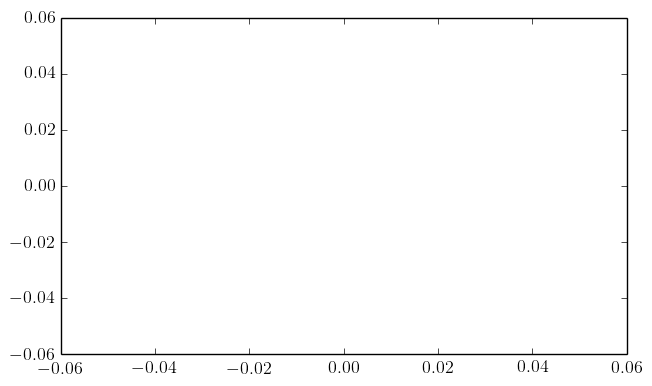

In [113]:
plt.plot(x,y)
#plt.yscale('log')
#plt.xscale('log')